In [522]:
import pandas as pd 
df = pd.read_csv(r"C:\Users\abhi1\Desktop\DS-Intern-Assignment-Abhinav-Gupta\data\data.csv")
df.head(1)

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.79,19.79,NaN,19.0,...,17.033333,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433


In [523]:
# extracting hour from timestamp column
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour.astype('float')
df.drop('timestamp', axis=1, inplace=True)
df.head(1)

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour
0,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.79,19.79,NaN,19.0,45.566667,...,45.53,6.6,733.5,92.0,7.0,63.0,5.3,13.275433,13.275433,17.0


In [524]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  16013 non-null  object 
 1   lighting_energy               16048 non-null  object 
 2   zone1_temperature             15990 non-null  object 
 3   zone1_humidity                16056 non-null  object 
 4   zone2_temperature             16004 non-null  object 
 5   zone2_humidity                15990 non-null  float64
 6   zone3_temperature             16055 non-null  float64
 7   zone3_humidity                15979 non-null  float64
 8   zone4_temperature             16041 non-null  float64
 9   zone4_humidity                16076 non-null  float64
 10  zone5_temperature             16019 non-null  float64
 11  zone5_humidity                16056 non-null  float64
 12  zone6_temperature             16009 non-null  float64
 13  z

In [525]:
# Convert each object column to float 
text_columns = df.select_dtypes(include='object').columns
df[text_columns] = df[text_columns].apply(lambda col: pd.to_numeric(col, errors='coerce'))
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   equipment_energy_consumption  15945 non-null  float64
 1   lighting_energy               15993 non-null  float64
 2   zone1_temperature             15908 non-null  float64
 3   zone1_humidity                15969 non-null  float64
 4   zone2_temperature             15934 non-null  float64
 5   zone2_humidity                15990 non-null  float64
 6   zone3_temperature             16055 non-null  float64
 7   zone3_humidity                15979 non-null  float64
 8   zone4_temperature             16041 non-null  float64
 9   zone4_humidity                16076 non-null  float64
 10  zone5_temperature             16019 non-null  float64
 11  zone5_humidity                16056 non-null  float64
 12  zone6_temperature             16009 non-null  float64
 13  z

In [526]:
df.isnull().sum()

equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1                826
random_variable2            

In [527]:
df.shape

(16857, 29)

In [528]:
# Remove rows where the target is missing
df = df.dropna(subset=['equipment_energy_consumption'])
df.shape

(15945, 29)

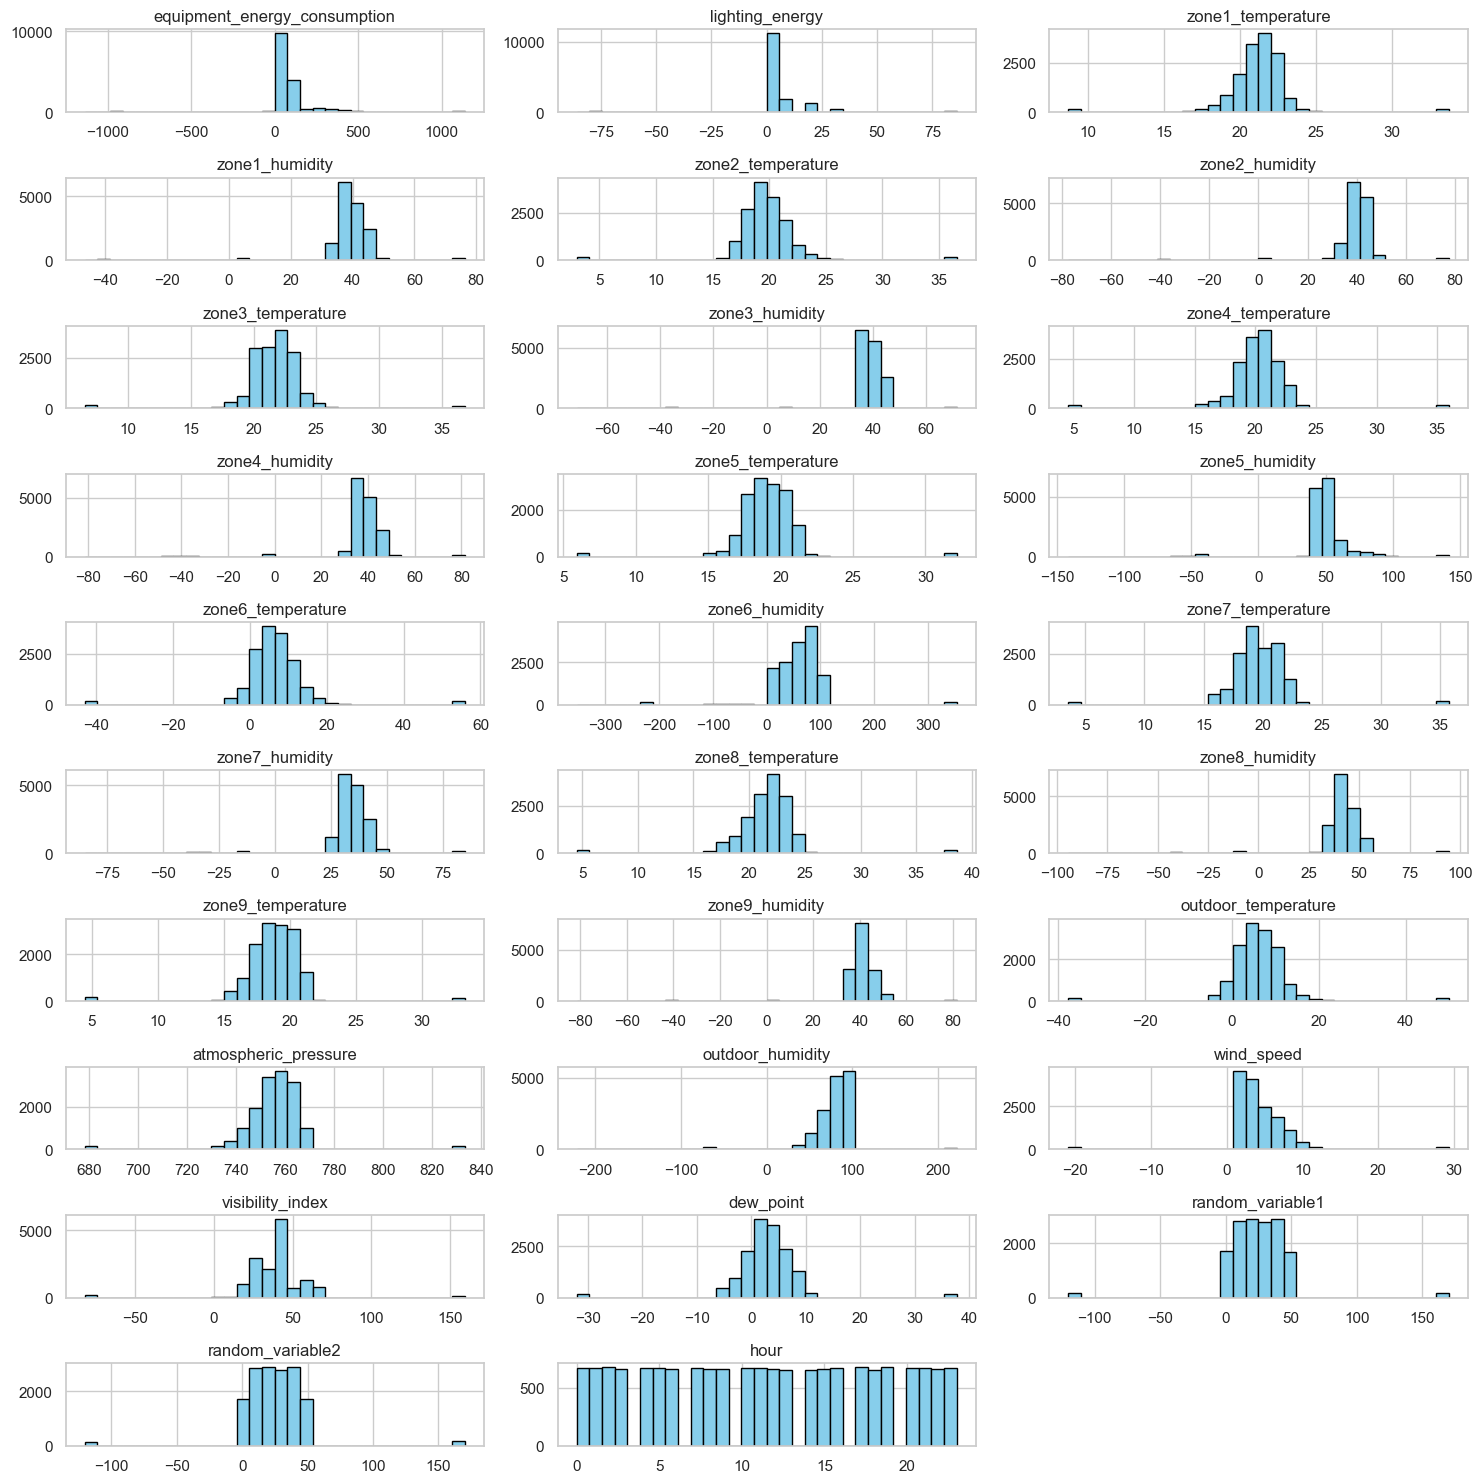

In [529]:
# plotting histograms of all features to check symmetery of features
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns) // 3 + 1, 3, i)
    plt.hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [530]:
df.skew().sort_values()


zone3_humidity                 -5.481574
zone1_humidity                 -4.638634
zone9_humidity                 -4.407771
zone2_humidity                 -4.383365
zone4_humidity                 -3.365544
zone8_humidity                 -3.009099
zone7_humidity                 -2.605690
outdoor_humidity               -2.013892
zone5_humidity                 -1.185781
zone4_temperature              -0.351604
zone3_temperature              -0.257828
visibility_index               -0.159578
random_variable1               -0.151376
zone6_humidity                 -0.124386
zone9_temperature              -0.103714
dew_point                      -0.054598
atmospheric_pressure           -0.027607
hour                            0.001697
zone1_temperature               0.034708
zone5_temperature               0.064108
wind_speed                      0.107928
zone6_temperature               0.113976
random_variable2                0.198469
zone8_temperature               0.200556
lighting_energy 

In [531]:
# replacing null value with median whose skewness is > 0.5 or < -0.5 and 
# with mean whose skewness is -0.5<skewness< 0.5 
skewness = df.skew()

for i in df.columns:
    if df[i].isnull().sum() > 0:
        if abs(skewness[i]) > 0.5:
            df[i].fillna(df[i].median(), inplace=True)  # Fill with median
        else:
            df[i].fillna(df[i].mean(), inplace=True)    # Fill with mean


C:\Users\abhi1\AppData\Local\Temp\ipykernel_13260\1570209754.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)    # Fill with mean
C:\Users\abhi1\AppData\Local\Temp\ipykernel_13260\1570209754.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [532]:
# null values removed
df.isnull().sum()

equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
hour                            0
dtype: int64

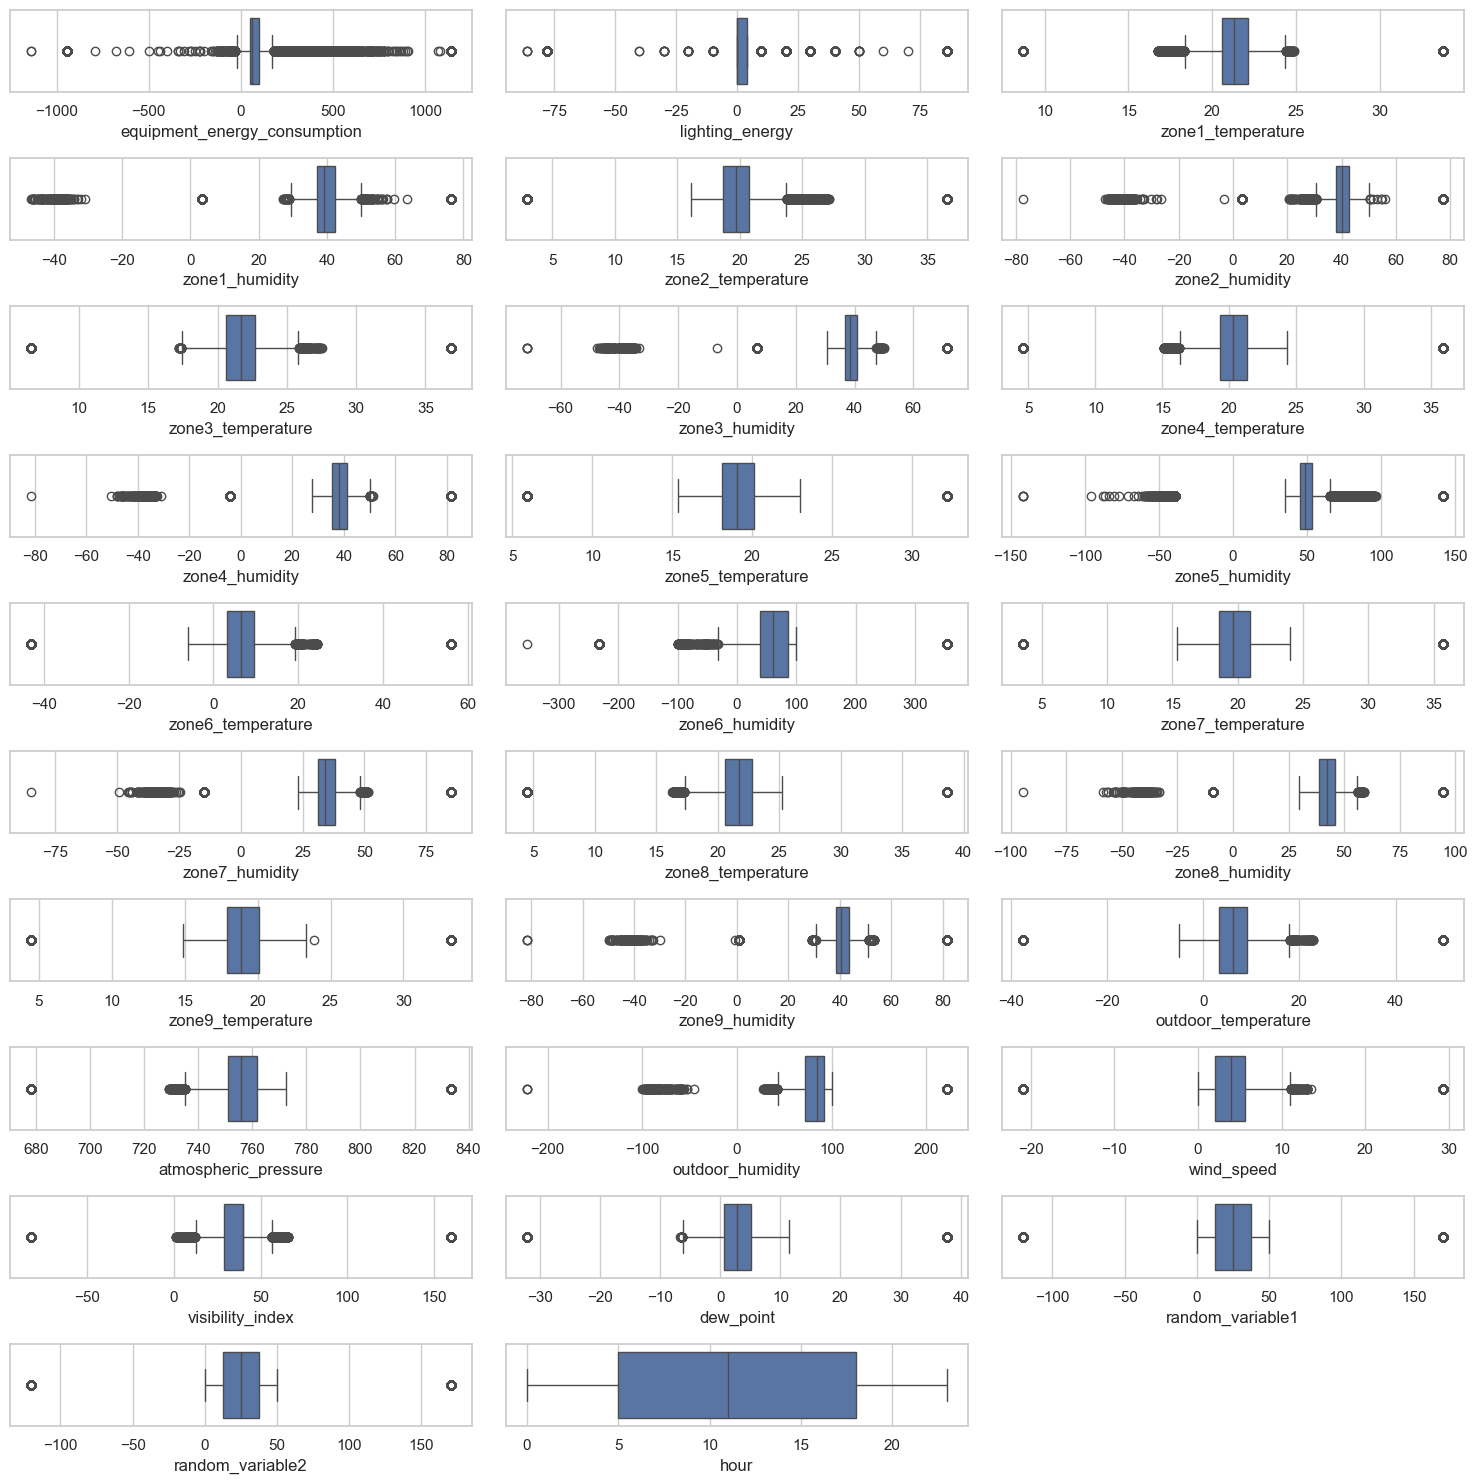

In [533]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 15))

for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns) // 3 + 1, 3, i)
    sns.boxplot(x=df[column])
plt.tight_layout()   
plt.show()
 


In [534]:
df.describe()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour
count,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,...,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000
mean,95.810413,3.919199,21.251424,39.076041,19.800708,39.540842,21.664800,38.202032,20.238389,37.941617,...,40.294083,6.219499,755.783923,79.272116,4.190155,38.438306,2.775858,24.853901,25.158975,11.490875
std,182.753554,14.300021,2.110888,9.628712,2.867936,9.786893,2.536150,9.826372,2.732804,10.558031,...,10.942886,7.427993,13.343820,27.673869,4.309378,20.872008,5.913933,25.586547,24.875749,6.934550
min,-1139.985693,-86.002966,8.726818,-46.660000,2.988199,-77.265503,6.543921,-71.406273,4.613485,-81.446225,...,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590,0.000000
25%,50.000000,0.000000,20.600000,37.133333,18.666667,37.933333,20.600000,36.760000,19.290000,35.290000,...,38.363333,3.166667,751.133333,72.000000,2.000000,29.000000,0.583333,12.814678,12.819508,5.000000
50%,60.000000,0.000000,21.290000,39.230000,19.726667,40.290000,21.666667,38.400000,20.238389,38.090000,...,40.400000,6.219499,755.816667,84.166667,4.000000,40.000000,2.775858,24.853901,25.158975,11.000000
75%,100.000000,3.919199,22.100000,42.290000,20.700000,42.790000,22.700000,41.000000,21.290000,41.233333,...,43.466667,9.066667,761.750000,91.500000,5.666667,40.000000,5.150000,37.251557,37.361588,18.000000
max,1139.985693,86.002966,33.746609,76.292756,36.552882,77.265503,36.823982,71.406273,35.921144,81.446225,...,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617,23.000000


In [535]:
# handling outliers
import numpy as np
from scipy.stats import zscore

df_columns = [col for col in df.columns if col != 'equipment_energy_consumption']
z_threshold = 3

for column in df_columns:
    column_zscores = zscore(df[column].dropna())
    
    full_zscores = pd.Series(index=df.index, dtype=float)
    full_zscores.loc[df[column].dropna().index] = column_zscores
    
    
    upper_limit = df.loc[full_zscores < z_threshold, column].max()
    lower_limit = df.loc[full_zscores > -z_threshold, column].min()
    
    
    df[column] = np.where(full_zscores > z_threshold, upper_limit,
                                    np.where(full_zscores < -z_threshold, lower_limit, df[column]))

# by looking at standard deviation , we can confirm that ouliers have been removed
df.describe()



,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour
count,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,...,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000,15945.000000
mean,95.810413,3.969199,21.237444,39.771668,19.820805,40.010492,21.691320,39.030104,20.245019,38.574467,...,41.073975,6.228186,755.665520,80.082081,4.245057,38.455317,2.773213,24.967126,25.023910,11.490875
std,182.753554,9.379501,1.329639,4.513839,1.822284,4.773823,1.626669,3.465638,1.658714,4.578701,...,4.389533,4.675922,8.111819,15.400365,2.627192,12.611300,3.600305,14.480147,14.485216,6.934550
min,-1139.985693,-30.000000,16.790000,27.023333,16.100000,20.463333,17.200000,30.663333,15.100000,27.660000,...,29.166667,-5.000000,729.300000,28.000000,0.000000,1.000000,-6.600000,0.006033,0.006033,0.000000
25%,50.000000,0.000000,20.600000,37.133333,18.666667,37.933333,20.600000,36.760000,19.290000,35.290000,...,38.363333,3.166667,751.133333,72.000000,2.000000,29.000000,0.583333,12.814678,12.819508,5.000000
50%,60.000000,0.000000,21.290000,39.230000,19.726667,40.290000,21.666667,38.400000,20.238389,38.090000,...,40.400000,6.219499,755.816667,84.166667,4.000000,40.000000,2.775858,24.853901,25.158975,11.000000
75%,100.000000,3.919199,22.100000,42.290000,20.700000,42.790000,22.700000,41.000000,21.290000,41.233333,...,43.466667,9.066667,761.750000,91.500000,5.666667,40.000000,5.150000,37.251557,37.361588,18.000000
max,1139.985693,40.000000,24.890000,63.360000,27.100000,56.026667,27.533333,50.163333,24.290000,51.090000,...,53.326667,22.800000,772.300000,100.000000,13.500000,66.000000,11.400000,49.996530,49.996530,23.000000


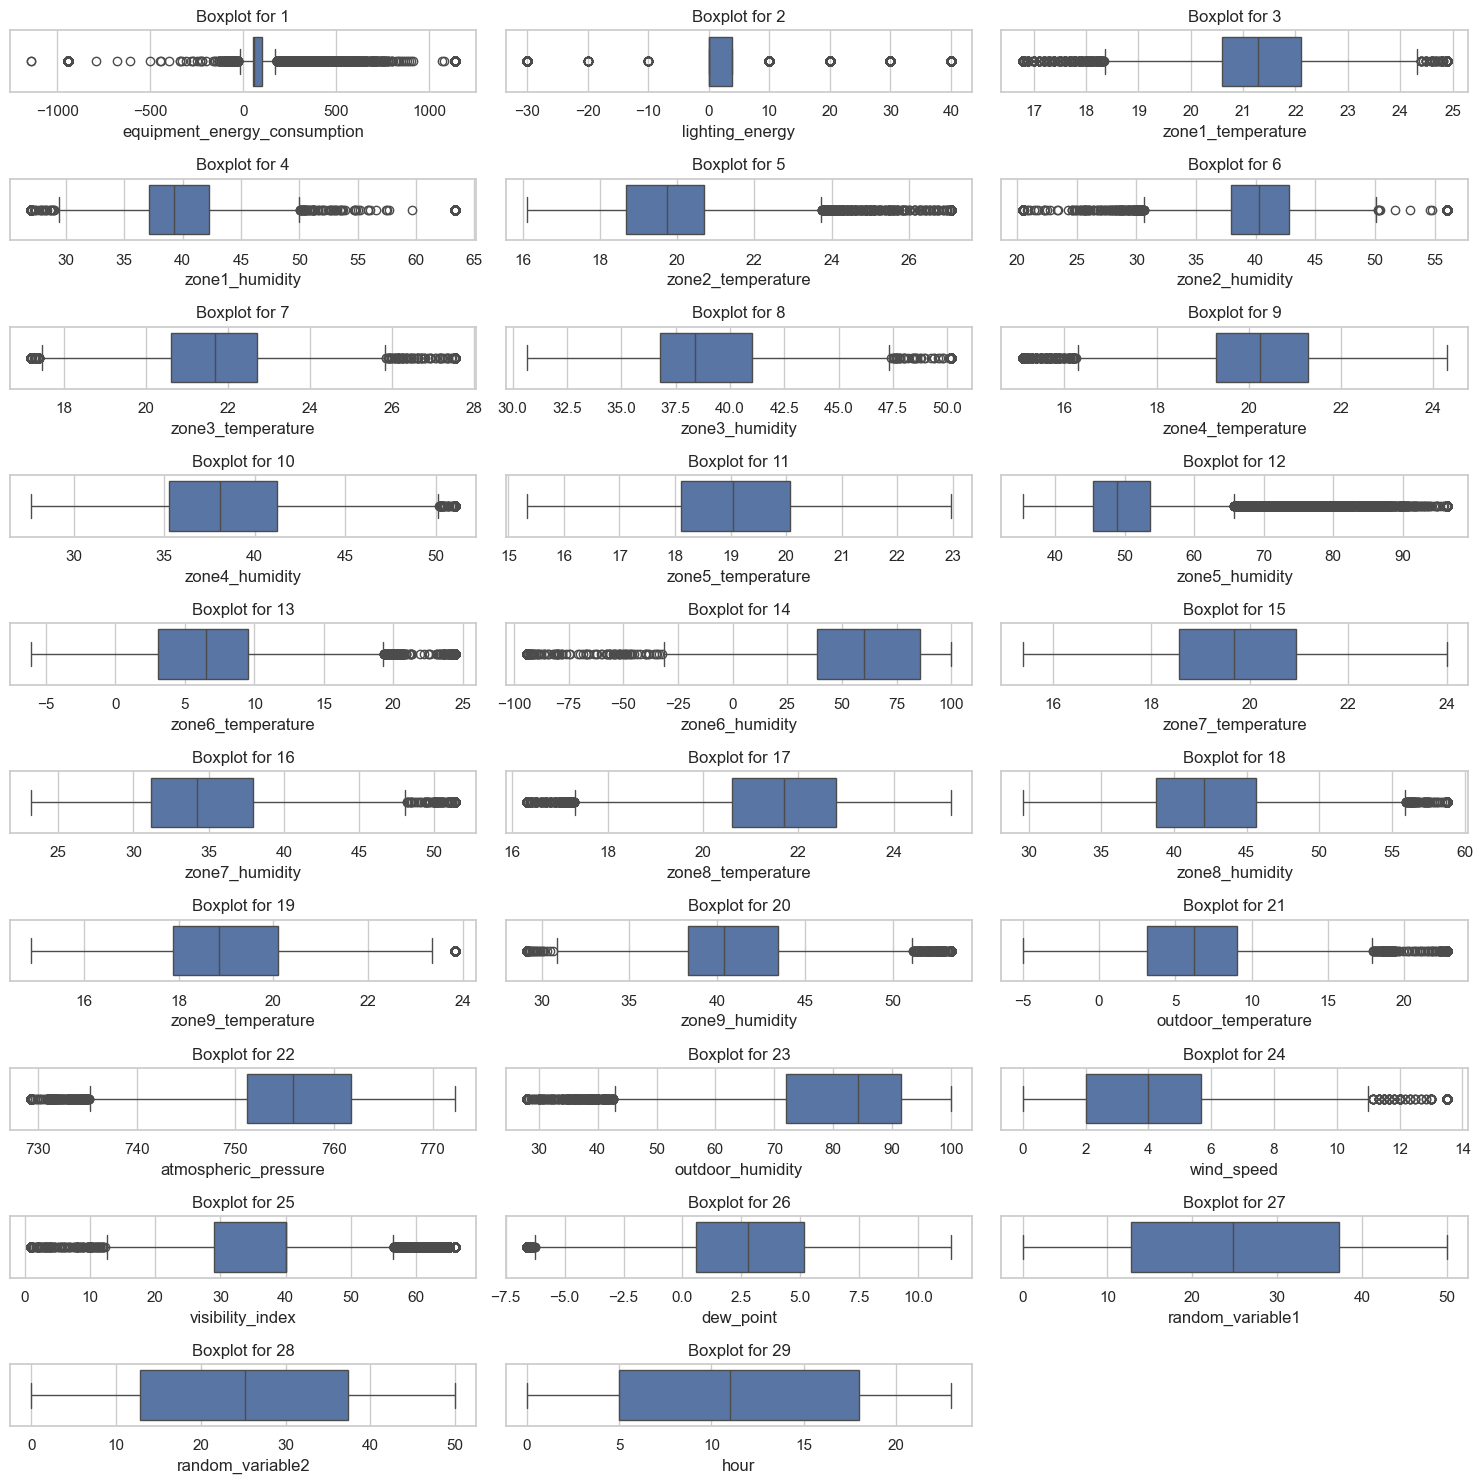

In [536]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(df.columns, 1):
    plt.subplot(len(df.columns) // 3 + 1, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {i}")
plt.tight_layout()   
plt.show()

In [537]:
#handling skewness of target variable by trying multiple methods
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PowerTransformer


# Box-Cox Transformation it is only for strictly positive values and modereately skewed data , that's why it is the best fit
positive_mask = df['equipment_energy_consumption'] > 0
df.loc[positive_mask, 'equipment_energy_consumption'], _ = boxcox(df.loc[positive_mask, 'equipment_energy_consumption'])
print(f"Box-Cox skewness: {skew(df.loc[positive_mask, 'equipment_energy_consumption'])}")


# Original skewness: 0.6226342502518225
# Box-Cox skewness: -0.04380462308095313
# Log_energy skewness: 1.3729844834851979
# Yeo_Johnson skewness: 3.0446835731418505
# Square Root skewness: 2.788244492647303


# # Log Transformation is not working because it is for highly skewed data
# df['log_energy'] = np.log1p(df['equipment_energy_consumption'])
# log_skewness = skew(df['log_energy'].dropna())
# print(f"Log_energy skewness: {log_skewness}")


# # Yeo Johnson Transformation it  handle negative and zero values that's why it is performing worst
# yeo = PowerTransformer(method='yeo-johnson')
# df['yeojohnson_energy'] = yeo.fit_transform(df[['equipment_energy_consumption']])
# yeojohnson_skewness = skew(df['yeojohnson_energy'].values)
# print(f"Yeo_Johnson skewness: {yeojohnson_skewness}")


# # Square Root Transformation (works for non-negative values)
# df['sqrt_energy'] = np.sqrt(df['equipment_energy_consumption'])
# sqrt_skewness = skew(df['sqrt_energy'].dropna())
# print(f"Square Root skewness: {sqrt_skewness}")


Box-Cox skewness: -0.04380462308095313


In [539]:
df.head()

,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,...,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2,hour
0,1.631347,-30.0,24.89,47.596667,19.2,44.790000,19.79,38.400000,19.000000,45.566667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,17.0
1,1.631347,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,17.0
2,1.611007,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,24.290000,45.890000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,17.0
3,1.611007,40.0,24.89,46.066667,19.2,44.590000,19.79,45.000000,20.238389,45.723333,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,11.4,45.410389,45.410389,17.0
4,1.631347,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,17.0
